In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Admission_Predict.csv')
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
146,147,315,105,3,2.0,2.5,8.48,0,1
154,155,326,108,3,3.0,3.5,8.89,0,1
291,292,300,102,2,1.5,2.0,7.87,0,0
293,294,312,98,1,3.5,3.0,8.18,1,0
354,355,297,98,2,2.5,3.0,7.67,0,0


In [3]:
data.drop(columns='Serial No.', axis=1, inplace=True)
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
15,314,105,3,3.5,2.5,8.30,0,0
41,316,105,2,2.5,2.5,8.20,1,0
356,327,109,3,3.5,4.0,8.77,1,1
134,333,113,5,4.0,4.0,9.28,1,1
129,333,118,5,5.0,5.0,9.35,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


### Treating the Categorical data and Scaling the data

In [5]:
df_dv = data['Chance of Admit']
df_iv = data.drop(columns='Chance of Admit', axis=1)

In [6]:
df_iv.sample(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
239,299,100,1,1.5,2.0,7.89,0
227,312,110,2,3.5,3.0,8.53,0


In [7]:
# Research is a categorical variable, cannot use this for scaling
df_iv['Research'] = df_iv['Research'].astype('object')
df_iv_numeric = df_iv.select_dtypes(include=np.number)
df_iv_categorical = df_iv.select_dtypes(exclude=np.number)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
stand_scalar = StandardScaler()

In [10]:
df_iv_numeric_scaled = stand_scalar.fit_transform(df_iv_numeric)
df_iv_numeric_scaled = pd.DataFrame(data=df_iv_numeric_scaled, columns=df_iv_numeric.columns)
df_iv_numeric_scaled.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
252,0.104064,-1.222385,-0.952029,-0.894980,0.052933,-0.098939
318,0.627656,0.592221,-0.076600,-0.894980,-1.618648,0.337617
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
156,-0.157732,-0.397564,-0.076600,-1.392191,-1.061454,-0.434751
228,0.104064,0.757186,-0.076600,0.596653,0.052933,0.119339


In [11]:
df_iv_scaled = pd.concat([df_iv_numeric_scaled, df_iv_categorical], axis=1)
df_iv_scaled.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
341,0.802187,0.427257,-0.076600,0.099442,0.052933,0.270455,1
302,0.453126,-0.397564,-0.952029,-0.397769,-0.504260,-0.250054,1
380,0.453126,-0.562528,-0.076600,0.099442,0.610127,0.404779,1
272,-1.990306,-2.047205,-1.827457,-1.889402,-2.175842,-1.610093,0
33,2.023903,1.087114,1.674257,0.596653,0.610127,1.680865,1


In [12]:
df_iv_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
dtypes: float64(6), object(1)
memory usage: 22.0+ KB


In [13]:
df_iv_scaled['Research'] = df_iv_scaled['Research'].astype(np.int64)
df_iv_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float64
 1   TOEFL Score        400 non-null    float64
 2   University Rating  400 non-null    float64
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.0 KB


### Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split
import statsmodels.api as api

In [15]:
df_iv_scaled_const = api.add_constant(df_iv_scaled)
df_iv_scaled_const.sample(2)

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
246,1.0,-0.070467,-0.397564,-0.076600,-0.397769,0.052933,0.220083,0
148,1.0,1.936637,1.417042,0.798829,0.596653,0.052933,2.016677,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_iv_scaled_const, 
                                                   df_dv, 
                                                   test_size=0.2,
                                                   random_state=10)

### Create the Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt_classifier = DecisionTreeClassifier()
model_dt = dt_classifier.fit(X_train, y_train)

In [19]:
y_pred = model_dt.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
from sklearn import tree

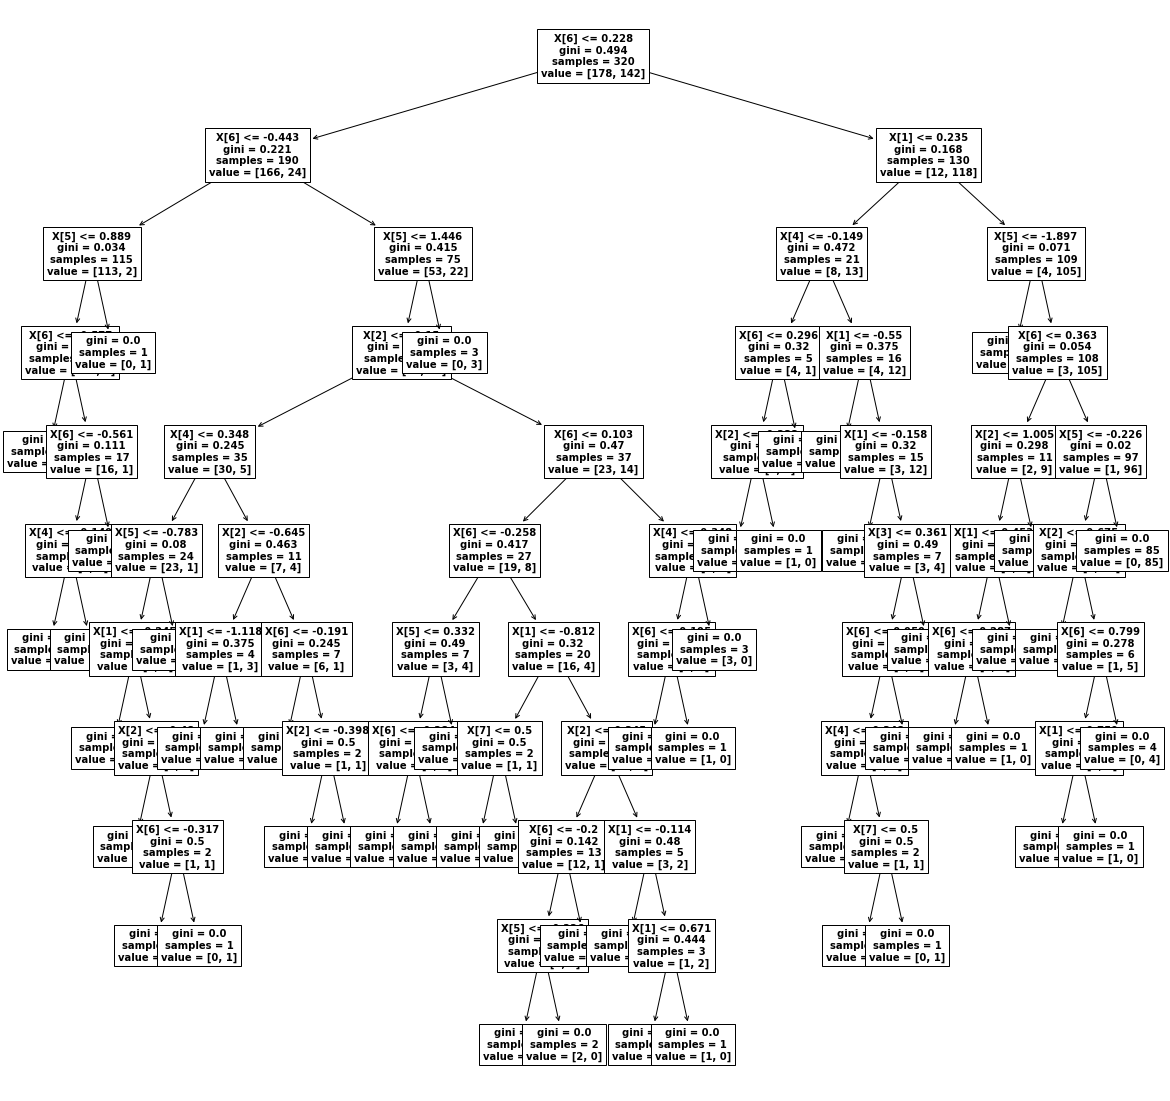

In [22]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model_dt, fontsize=10)
plt.show()

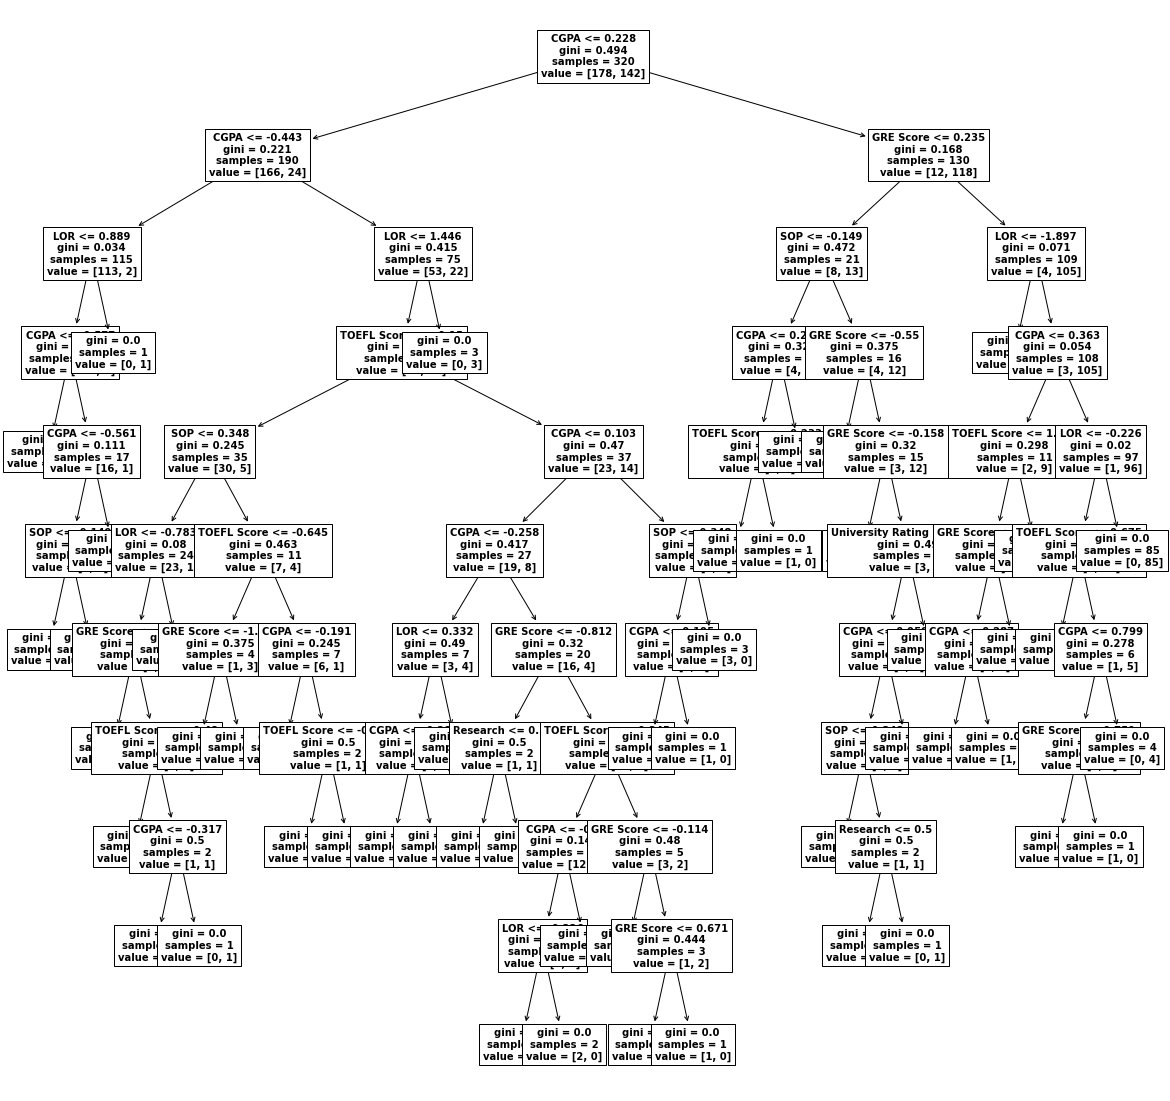

In [23]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model_dt, feature_names=X_train.columns, fontsize=10)
plt.show()

In [24]:
import pydotplus
from IPython.display import Image

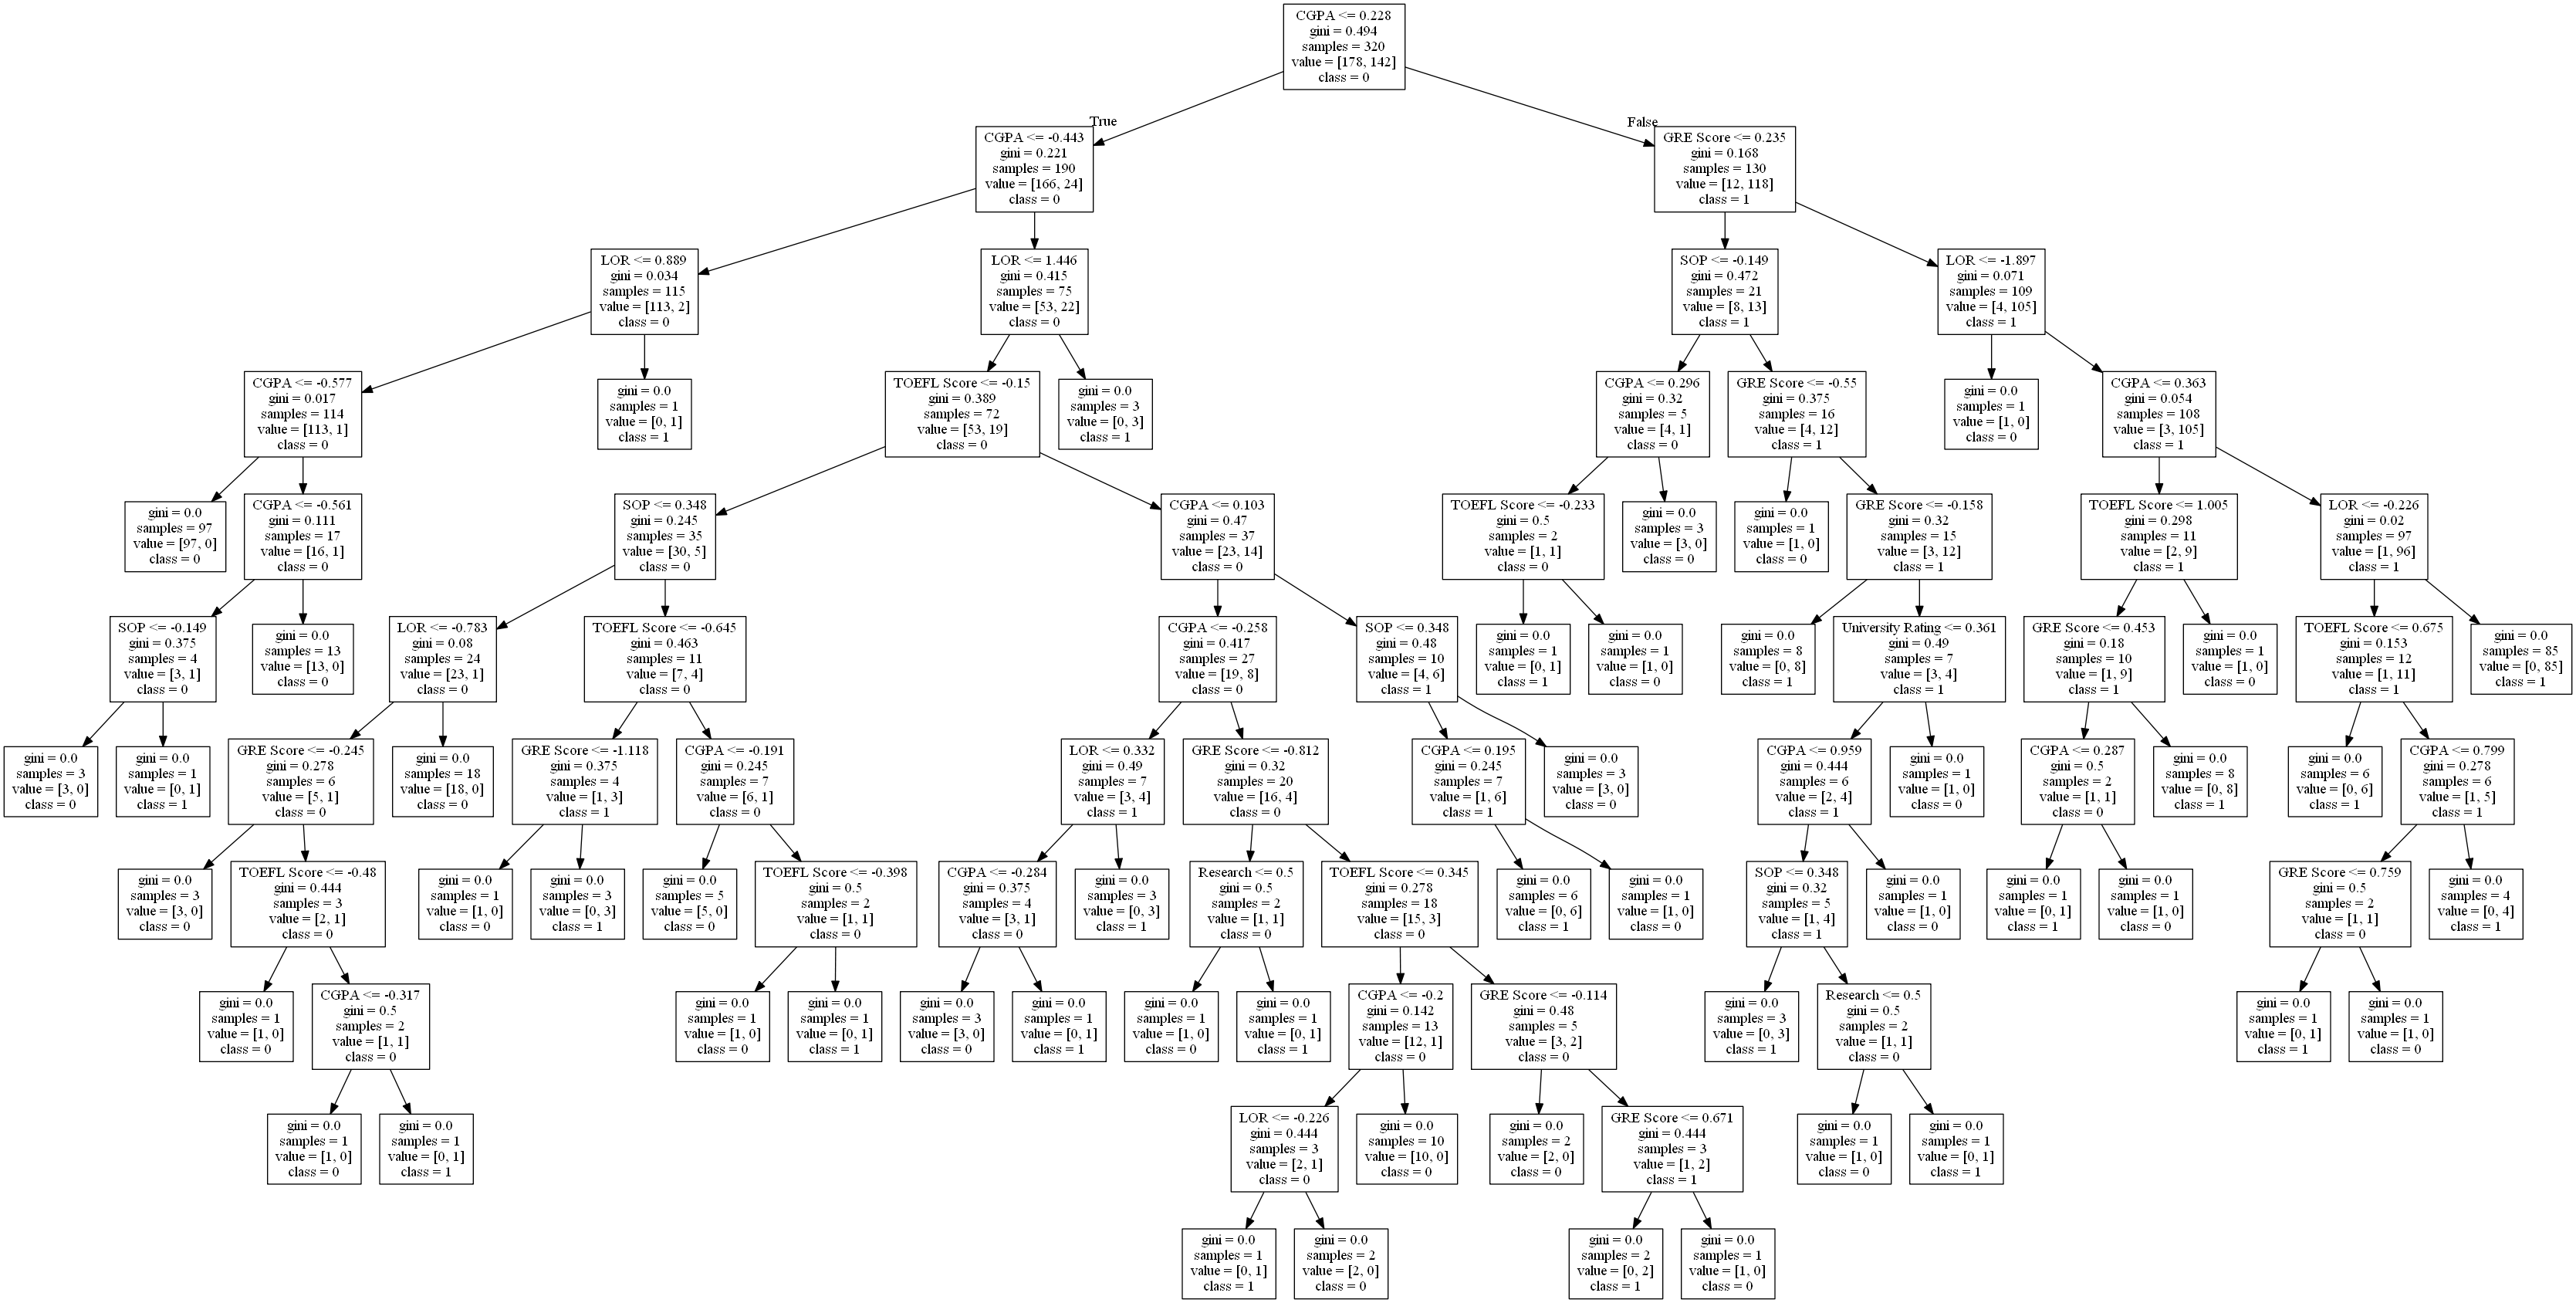

In [25]:
dot_data = tree.export_graphviz(decision_tree=model_dt,
                    feature_names=X_test.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Creating DT model with unscaled data

In [36]:
X_traino, X_testo, y_traino, y_testo = train_test_split(df_iv, df_dv, test_size=0.2, random_state=10)
model_dt_orginaldata = DecisionTreeClassifier()
model_dt_orginaldata = model_dt_orginaldata.fit(X_traino, y_traino)
y_predo = model_dt_orginaldata.predict(X_testo)

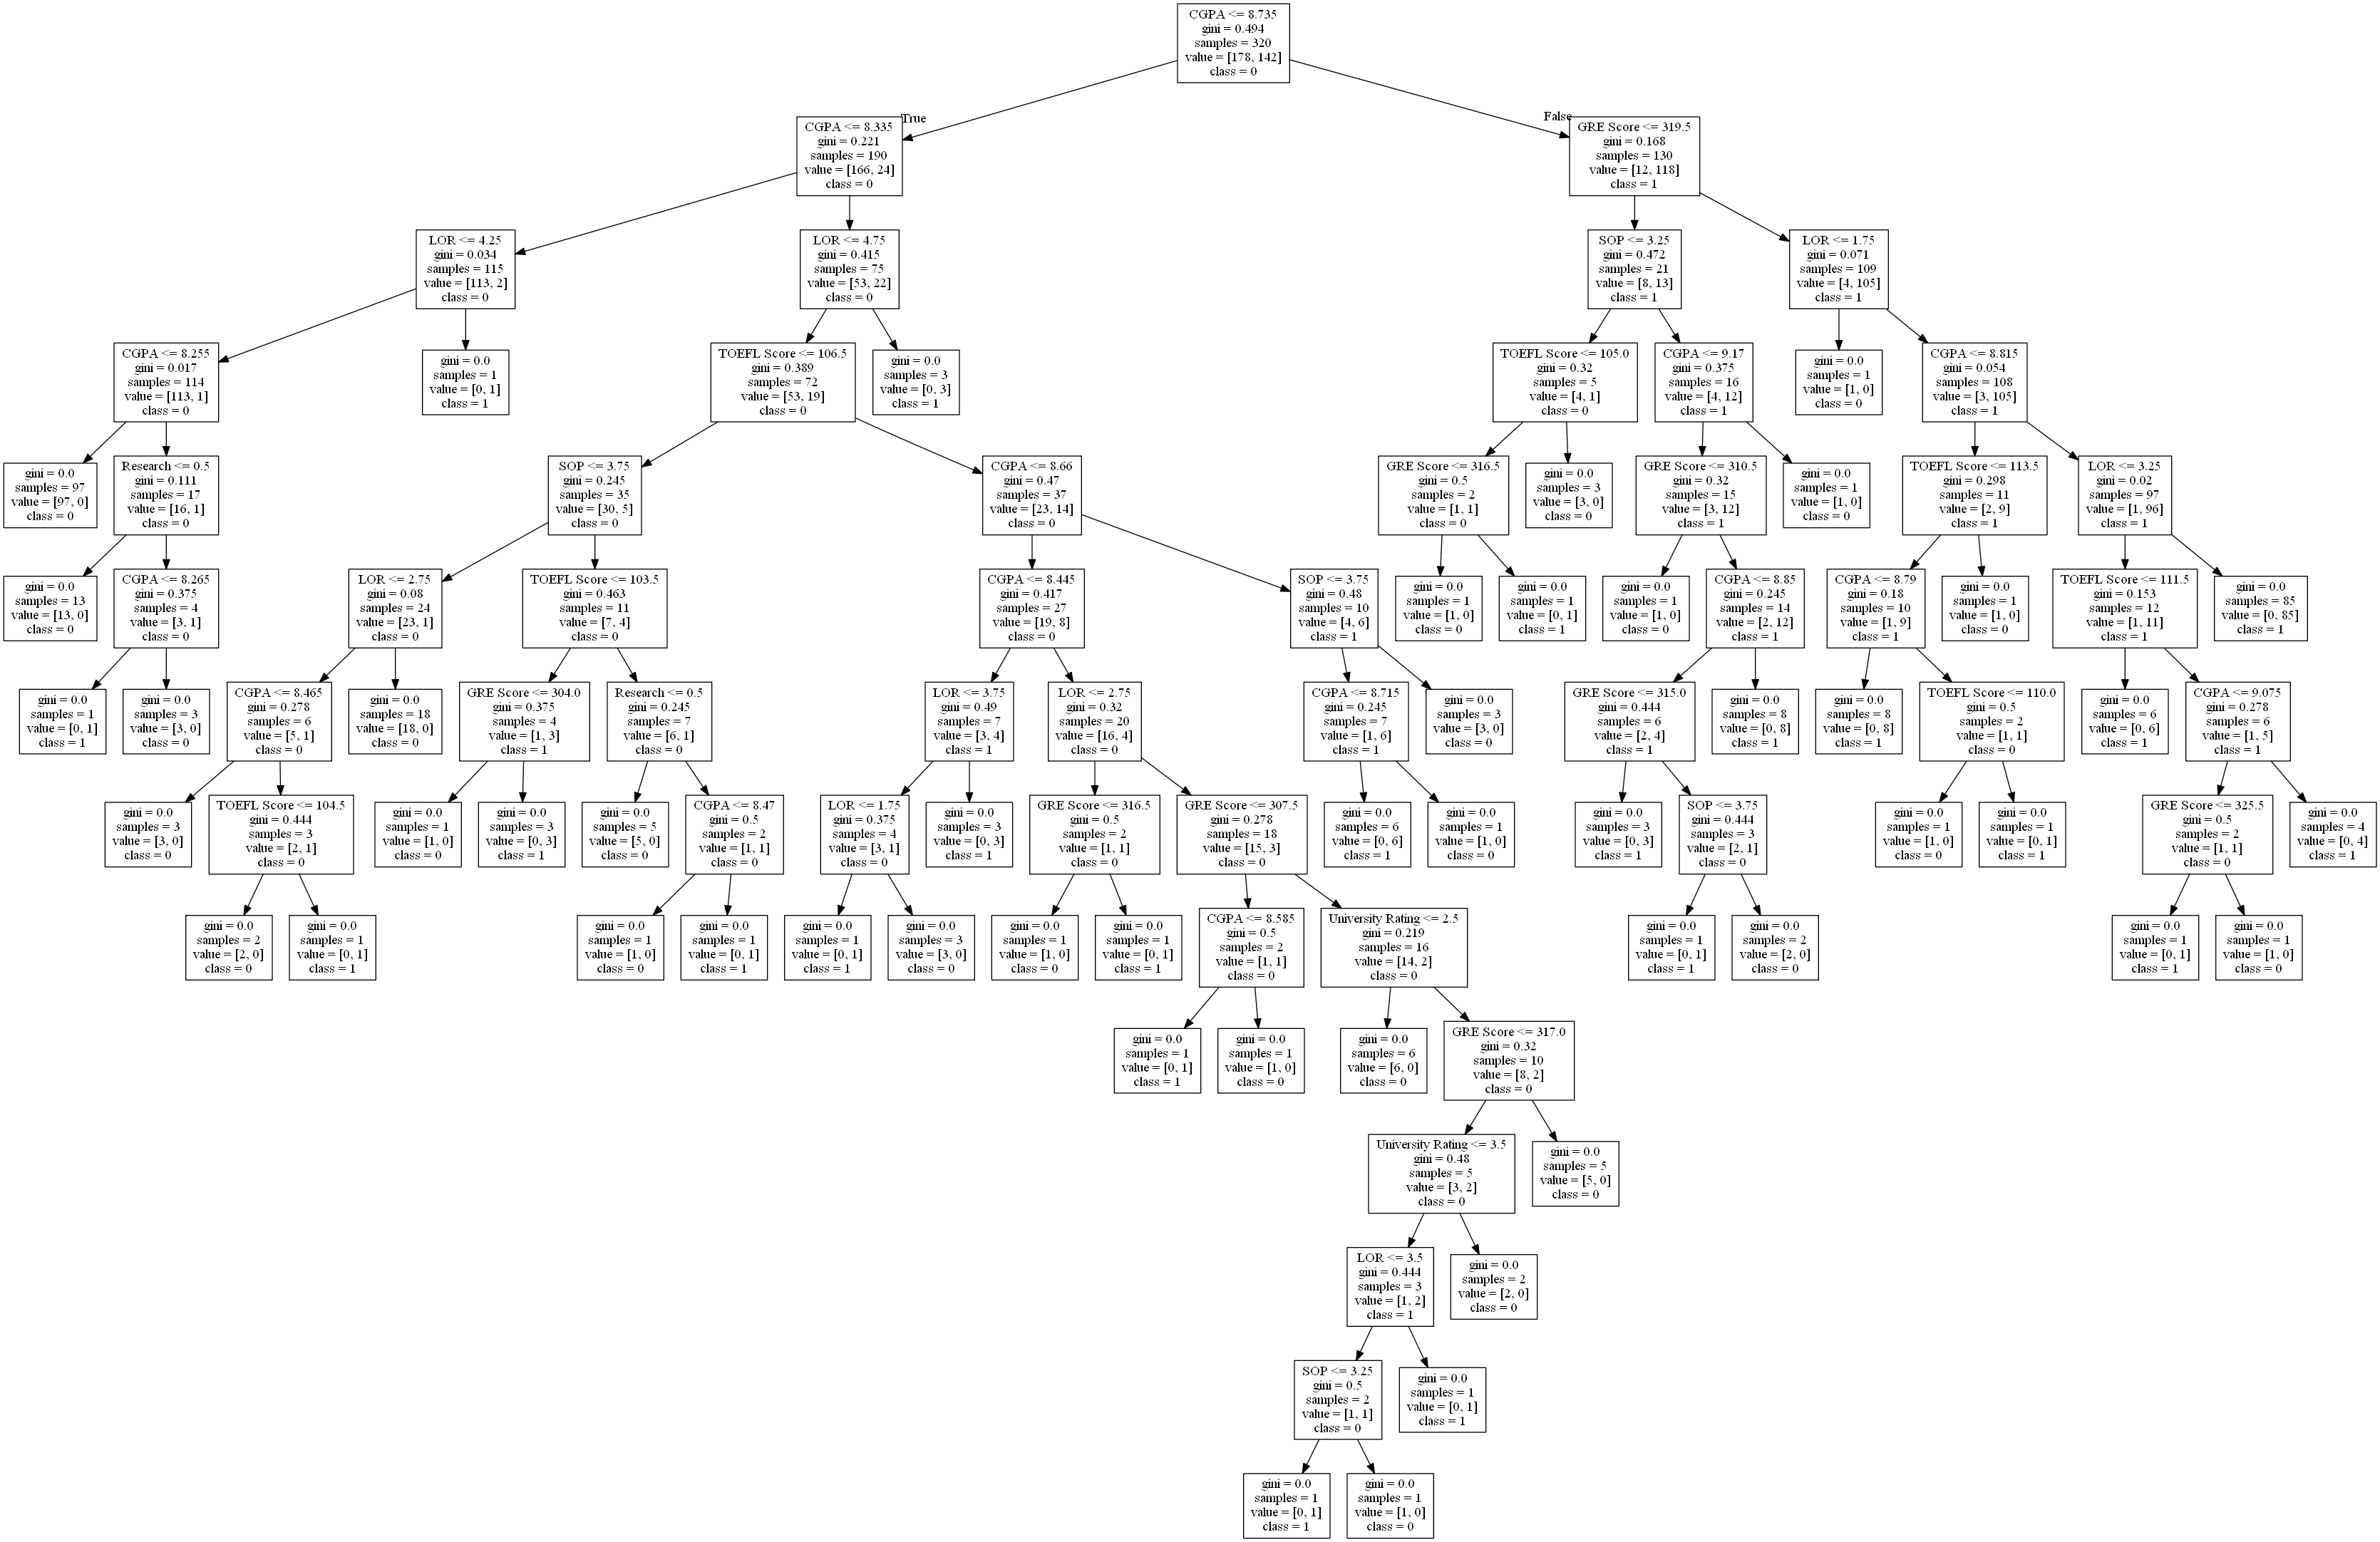

In [39]:
dot_datao = tree.export_graphviz(decision_tree=model_dt_orginaldata, feature_names=X_testo.columns, class_names=['0', '1'])
grapho = pydotplus.graph_from_dot_data(dot_datao)
Image(grapho.create_png())

In [40]:
print('There is no impact on Decision Tree if the data is scaled or not')

There is no impact on Decision Tree if the data is scaled or not


In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

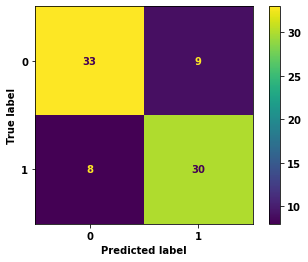

In [27]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,
                                                        y_pred=y_pred),
                      display_labels=model_dt.classes_).plot()

In [28]:
from sklearn.metrics import classification_report

In [29]:
print( classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.77      0.79      0.78        38

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



### Checking the model performance

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
score = cross_val_score(estimator=model_dt, 
                       X=df_iv_scaled_const,
                       y=df_dv, cv=5, scoring='f1')
score

array([0.79518072, 0.79452055, 0.86486486, 0.76056338, 0.8115942 ])

In [32]:
print("Bias Error: ", 1 - np.mean(score))
print("Variance Error: ", np.std(score)/np.mean(score))

Bias Error:  0.19465525622362456
Variance Error:  0.04231840925248309


In [45]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

In [ ]:
max_depth 
min_samples_split 
min_samples_leaf 
min_weight_fraction_leaf 
max_features 
max_leaf_nodes
min_impurity_decrease 
min_impurity_split 
